# <u>Zonal Statistics of the Hornsund Fjord </u>  <br /> <sub> <span style="font-size:smaller;"> Jullian C.B. Williams </span> </sub> <br /> <sub> <span style="font-size:smaller;"> *Polish Academy of Sciences, Institute of Geophysics, Warsaw, Poland* </span> </sub>


In [1]:
import fiona
import random
import warnings
import argparse, os

import numpy as np
import pandas as pd
from osgeo import ogr
from osgeo import gdal #<---- to geospatial env.
import geopandas as gpd

from PIL import Image

import seaborn as sns
import rasterio as rio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.plot import show_hist 
from rasterstats import zonal_stats
from rasterio.features import shapes
from rasterio.plot import adjust_band
from rasterio.features import rasterize

import seaborn as sns
import matplotlib.image
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib import patches as mpatches
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

## Import sample data from methods

In [2]:
input_dir = "C:/Users/jullian.williams/Desktop/test/"

datasets = []

# Loop through all .tif files in the input directory
for subdir, _, files in os.walk(input_dir):
    for filename in files: 
        # Check if the file is an image (e.g., .jpg, .png)
        if filename.endswith(('.tif')):
            input_path = os.path.join(subdir, filename)

             
            with rio.open(input_path) as src:
                profile = src.profile  # Save metadata
                transform_ = src.transform
                crs_=src.crs
                b1 = src.read(1)

                datasets.append(b1)
                
                # Stack bands
                stacked_array = np.stack(datasets, axis=0) #extent=[80,120,32,0]
                nrg = np.squeeze(stacked_array)
                # nrg = np.squeeze(image).transpose(1, 2, 0)
                nrg = np.moveaxis(stacked_array, 0, -1)
                mn = np.mean(nrg, axis=-1)
                sm = np.sum(nrg, axis=-1)
                md = np.median(nrg, axis=-1)
                sd = np.std(nrg, axis=-1)

                kwargs = src.meta
                kwargs.update(
                    dtype=rio.float32,
                    width = 864,
                    height= 561)
               
                # with rio.open("C:/Users/jullian.williams/Desktop/DIFF/mean_SVM.tif", 'w', **kwargs) as dst:
                #     dst.write(mn.astype(rio.float32),1)

                # with rio.open("C:/Users/jullian.williams/Desktop/DIFF/sum_SVM.tif", 'w', **kwargs) as dst:
                #     dst.write(sm.astype(rio.float32),1)

                # with rio.open("C:/Users/jullian.williams/Desktop/DIFF/median_SVM.tif", 'w', **kwargs) as dst:
                #     dst.write(md.astype(rio.float32),1)
                    
                # with rio.open("C:/Users/jullian.williams/Desktop/DIFF/sd_SVM.tif", 'w', **kwargs) as dst:
                #     dst.write(sd.astype(rio.float32),1)
                
                # View the color composite
                # plt.imshow(sd)

In [23]:
input_dir = "C:/Users/jullian.williams/Desktop/test_/"

datasets = []

# Loop through all .tif files in the input directory
for subdir, _, files in os.walk(input_dir):
    for filename in files: 
        # Check if the file is an image (e.g., .jpg, .png)
        if filename.endswith(('.tif')):
            input_path = os.path.join(subdir, filename)

             
            with rio.open(input_path) as src:
                profile = src.profile  # Save metadata
                transform_ = src.transform
                crs_=src.crs
                b1 = src.read(1)

                datasets.append(b1)
                
                # Stack bands
                stacked_array = np.stack(datasets, axis=0) #extent=[80,120,32,0]
                nrg = np.squeeze(stacked_array)
                # nrg = np.squeeze(image).transpose(1, 2, 0)
                nrg = np.moveaxis(stacked_array, 0, -1)
                mn = np.mean(nrg, axis=-1)
                sm = np.sum(nrg, axis=-1)
                md = np.median(nrg, axis=-1)
                sd = np.std(nrg, axis=-1)

                kwargs = src.meta
                kwargs.update(
                    dtype=rio.float32,
                    width = 864,
                    height= 561)
               
                # with rio.open("C:/Users/jullian.williams/Desktop/DIFFx/mean_SVM.tif", 'w', **kwargs) as dst:
                #     dst.write(mn.astype(rio.float32),1)

                # with rio.open("C:/Users/jullian.williams/Desktop/DIFFx/sum_SVM.tif", 'w', **kwargs) as dst:
                #     dst.write(sm.astype(rio.float32),1)

                # with rio.open("C:/Users/jullian.williams/Desktop/DIFFx/median_SVM.tif", 'w', **kwargs) as dst:
                #     dst.write(md.astype(rio.float32),1)
                    
                # with rio.open("C:/Users/jullian.williams/Desktop/DIFFx/sd_SVM.tif", 'w', **kwargs) as dst:
                #     dst.write(sd.astype(rio.float32),1)
                
                # View the color composite
                # plt.imshow(sd)

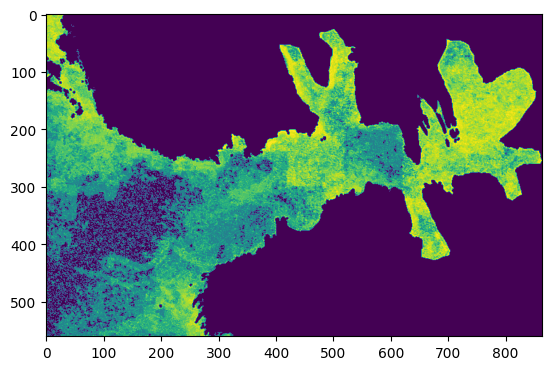

In [3]:
plt.imshow(sd)

In [9]:
input_dir = "C:/Users/jullian.williams/Desktop/test2/"

datasets = []

# Loop through all .tif files in the input directory
for subdir, _, files in os.walk(input_dir):
    for filename in files: 
        # Check if the file is an image (e.g., .jpg, .png)
        if filename.endswith(('.tif')):
            input_path = os.path.join(subdir, filename)

             
            with rio.open(input_path) as src:
                profile = src.profile  # Save metadata
                transform_ = src.transform
                crs_=src.crs
                b1 = src.read(1)

                datasets.append(b1)
                
                # Stack bands
                stacked_array = np.stack(datasets, axis=0)
                # nrg = np.squeeze(stacked_array)
                # nrg = np.squeeze(image).transpose(1, 2, 0)
                nrg2 = np.moveaxis(stacked_array, 0, -1)
                mn2 = np.mean(nrg2, axis=-1)
                sm2 = np.sum(nrg2, axis=-1)
                md2 = np.median(nrg2, axis=-1)
                sd2 = np.std(nrg2, axis=-1)
                
                kwargs = src.meta
                kwargs.update(
                    dtype=rio.float32,
                    width = 864,
                    height= 561)
               
                # with rio.open("C:/Users/jullian.williams/Desktop/DIFF/mean_gauss.tif", 'w', **kwargs) as dst:
                #     dst.write(mn2.astype(rio.float32),1)

                # with rio.open("C:/Users/jullian.williams/Desktop/DIFF/sum_gauss.tif", 'w', **kwargs) as dst:
                #     dst.write(sm2.astype(rio.float32),1)

                # with rio.open("C:/Users/jullian.williams/Desktop/DIFF/median_gauss.tif", 'w', **kwargs) as dst:
                #     dst.write(md2.astype(rio.float32),1)
                    
                # with rio.open("C:/Users/jullian.williams/Desktop/DIFF/sd_gauss.tif", 'w', **kwargs) as dst:
                #     dst.write(sd2.astype(rio.float32),1)
                # View the color composite
                # plt.imshow(sd2, extent=[0,864,500,0])

In [40]:
input_dir = "C:/Users/jullian.williams/Desktop/test2_/"

datasets = []

# Loop through all .tif files in the input directory
for subdir, _, files in os.walk(input_dir):
    for filename in files: 
        # Check if the file is an image (e.g., .jpg, .png)
        if filename.endswith(('.tif')):
            input_path = os.path.join(subdir, filename)

             
            with rio.open(input_path) as src:
                profile = src.profile  # Save metadata
                transform_ = src.transform
                crs_=src.crs
                b1 = src.read(1)

                datasets.append(b1)
                
                # Stack bands
                stacked_array = np.stack(datasets, axis=0)
                # nrg = np.squeeze(stacked_array)
                # nrg = np.squeeze(image).transpose(1, 2, 0)
                nrg2 = np.moveaxis(stacked_array, 0, -1)
                mn2 = np.mean(nrg2, axis=-1)
                sm2 = np.sum(nrg2, axis=-1)
                md2 = np.median(nrg2, axis=-1)
                sd2 = np.std(nrg2, axis=-1)
                
                kwargs = src.meta
                kwargs.update(
                    dtype=rio.float32,
                    width = 864,
                    height= 561)
               
                # with rio.open("C:/Users/jullian.williams/Desktop/DIFFx/mean_gauss.tif", 'w', **kwargs) as dst:
                #     dst.write(mn2.astype(rio.float32),1)

                # with rio.open("C:/Users/jullian.williams/Desktop/DIFFx/sum_gauss.tif", 'w', **kwargs) as dst:
                #     dst.write(sm2.astype(rio.float32),1)

                # with rio.open("C:/Users/jullian.williams/Desktop/DIFFx/median_gauss.tif", 'w', **kwargs) as dst:
                #     dst.write(md2.astype(rio.float32),1)
                    
                # with rio.open("C:/Users/jullian.williams/Desktop/DIFFx/sd_gauss.tif", 'w', **kwargs) as dst:
                #     dst.write(sd2.astype(rio.float32),1)
                # View the color composite
                # plt.imshow(sd2, extent=[0,864,500,0])

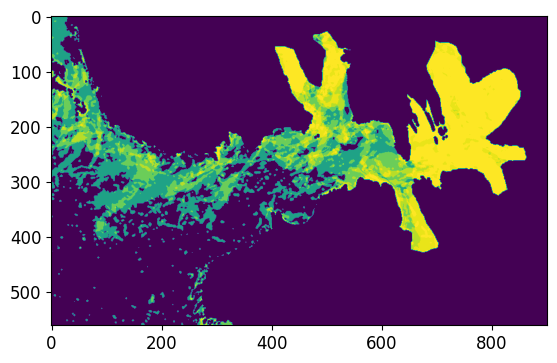

In [41]:
plt.imshow(sd2)

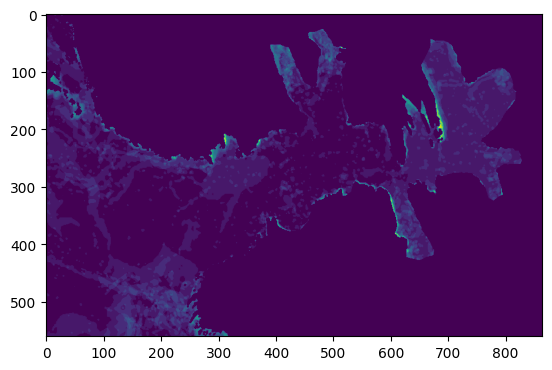

In [3]:
#January stacks
r1 = rio.open('C:/Users/jullian.williams/Desktop/DIFF/mean_SVM.tif')
r2 = rio.open('C:/Users/jullian.williams/Desktop/DIFF/median_SVM.tif')
r3 = rio.open('C:/Users/jullian.williams/Desktop/DIFF/sum_SVM.tif')
r4 = rio.open('C:/Users/jullian.williams/Desktop/DIFF/sd_SVM.tif')

r5 = rio.open('C:/Users/jullian.williams/Desktop/DIFF/mean_gauss.tif')
r6 = rio.open('C:/Users/jullian.williams/Desktop/DIFF/median_gauss.tif')
r7 = rio.open('C:/Users/jullian.williams/Desktop/DIFF/sum_gauss.tif')
r8 = rio.open('C:/Users/jullian.williams/Desktop/DIFF/sd_gauss.tif')


# Convert to numpy arrays
mean_svm = r1.read(1)
median_svm = r2.read(1)
sum_svm = r3.read(1)
sd_svm = r4.read(1)

mean_gs = r5.read(1)
median_gs = r6.read(1)
sum_gs = r7.read(1)
sd_gs = r8.read(1)


# View the color composite
plt.imshow(mean_gs)

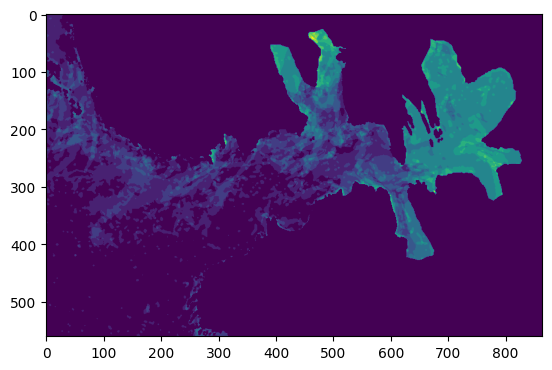

In [4]:
# February stacks
r1_ = rio.open('C:/Users/jullian.williams/Desktop/DIFFx/mean_SVM.tif')
r2_ = rio.open('C:/Users/jullian.williams/Desktop/DIFFx/median_SVM.tif')
r3_ = rio.open('C:/Users/jullian.williams/Desktop/DIFFx/sum_SVM.tif')
r4_ = rio.open('C:/Users/jullian.williams/Desktop/DIFFx/sd_SVM.tif')

r5_ = rio.open('C:/Users/jullian.williams/Desktop/DIFFx/mean_gauss.tif')
r6_ = rio.open('C:/Users/jullian.williams/Desktop/DIFFx/median_gauss.tif')
r7_ = rio.open('C:/Users/jullian.williams/Desktop/DIFFx/sum_gauss.tif')
r8_ = rio.open('C:/Users/jullian.williams/Desktop/DIFFx/sd_gauss.tif')


# Convert to numpy arrays
mean_svm_ = r1_.read(1)
median_svm_ = r2_.read(1)
sum_svm_ = r3_.read(1)
sd_svm_ = r4_.read(1)

mean_gs_ = r5_.read(1)
median_gs_ = r6_.read(1)
sum_gs_ = r7_.read(1)
sd_gs_ = r8_.read(1)


# View the color composite
plt.imshow(mean_gs_)

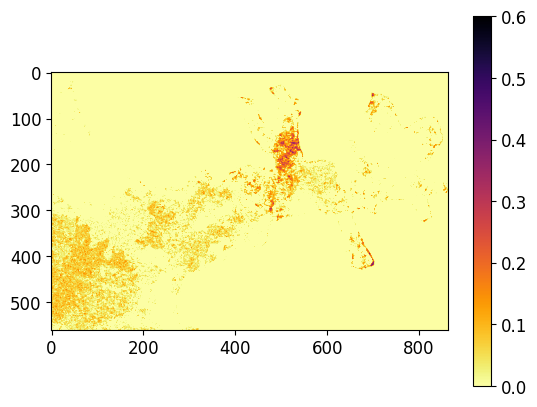

In [7]:
mnmean = mean_svm-mean_svm_
plt.imshow(mnmean, vmin = 0, vmax = 0.6, cmap = 'inferno_r')
plt.colorbar()
plt.show()

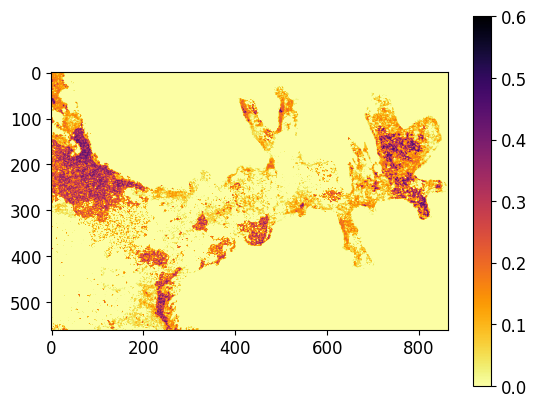

In [8]:
mnsd = sd_svm-sd_svm_
plt.imshow(mnsd, vmin = 0, vmax = 0.6, cmap = 'inferno_r')
plt.colorbar()
plt.show()

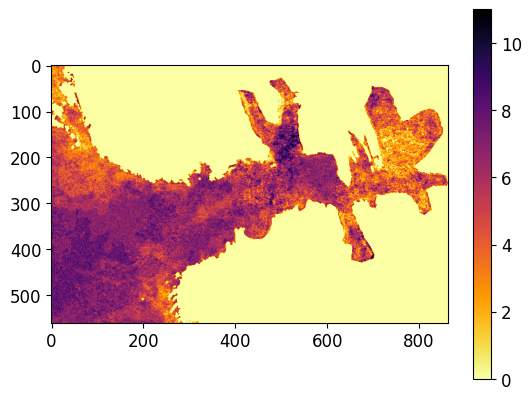

In [9]:
mnsum = sum_svm-sum_svm_
plt.imshow(mnsum, vmin = 0, vmax = 11, cmap = 'inferno_r')
plt.colorbar()
plt.show()

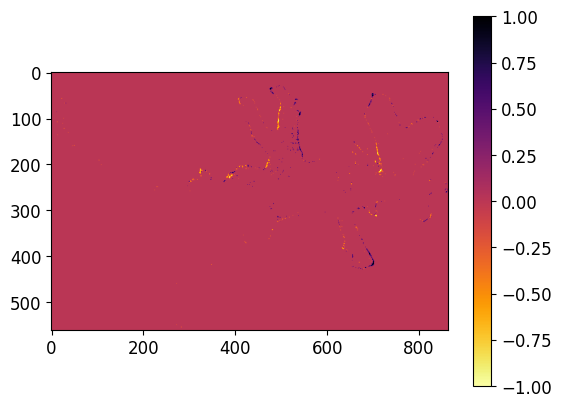

In [10]:
mnmedian = median_svm-median_svm_
plt.imshow(mnmedian, vmin =-1, vmax =1, cmap = 'inferno_r')
plt.colorbar()
plt.show()

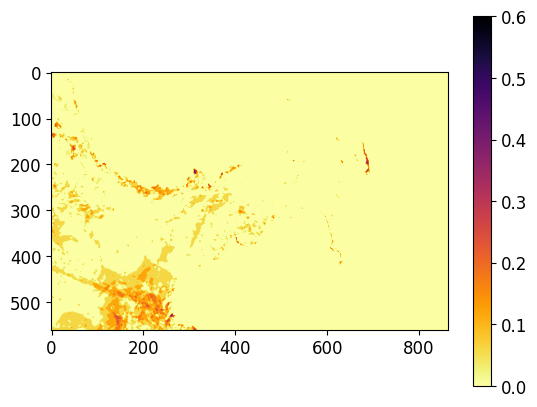

In [11]:
sgmean = mean_gs-mean_gs_
plt.imshow(sgmean, vmin = 0, vmax = 0.6, cmap = 'inferno_r')
plt.colorbar()
plt.show()

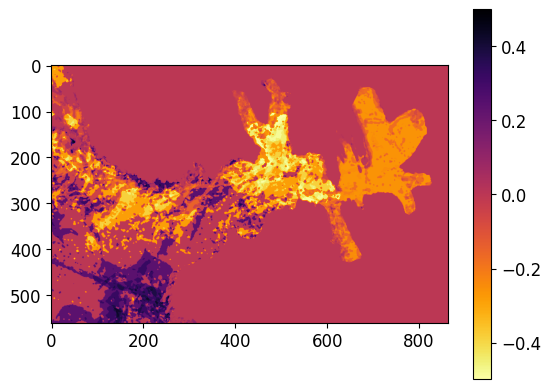

In [12]:
sgsd = sd_gs-sd_gs_
plt.imshow(sgsd,cmap = 'inferno_r')
plt.colorbar()
plt.show()

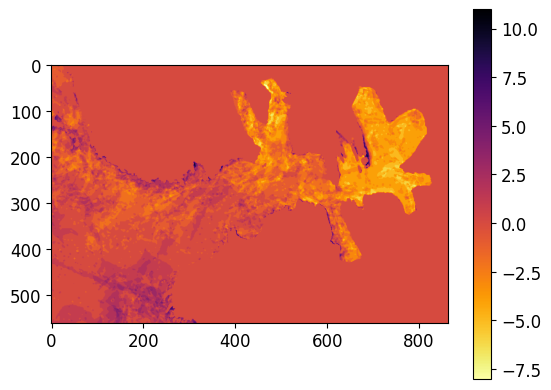

In [13]:
sgsum = sum_gs-sum_gs_
plt.imshow(sgsum,   vmin = -8, vmax = 11,cmap = 'inferno_r')
plt.colorbar()
plt.show()

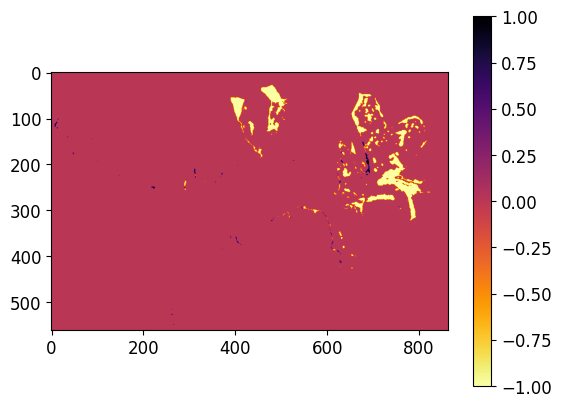

In [14]:
sgmedian = median_gs-median_gs_
plt.imshow(sgmedian, vmin = -1, vmax = 1,cmap = 'inferno_r')
plt.colorbar()
plt.show()

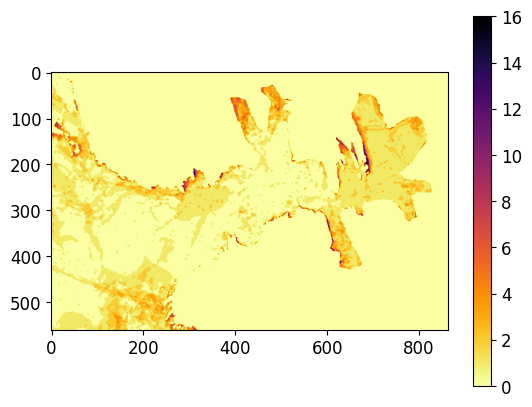

In [31]:
plt.imshow(sum_gs,cmap = 'inferno_r')
plt.colorbar()
plt.show()

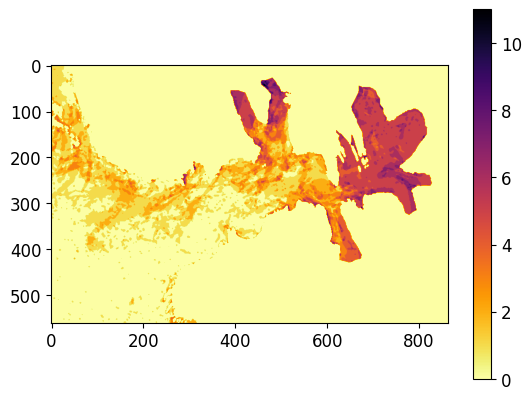

In [32]:
plt.imshow(sum_gs_,cmap = 'inferno_r')
plt.colorbar()
plt.show()

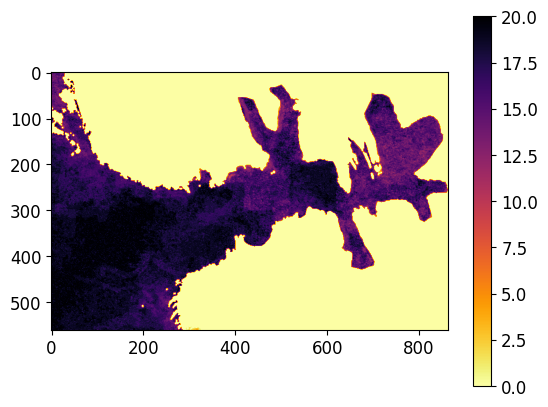

In [33]:
plt.imshow(sum_svm,cmap = 'inferno_r')
plt.colorbar()
plt.show()

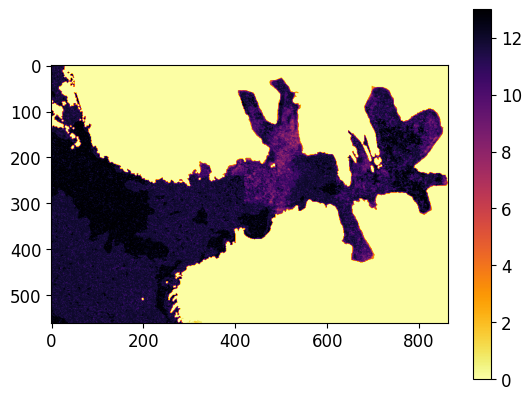

In [34]:
plt.imshow(sum_svm_,cmap = 'inferno_r')
plt.colorbar()
plt.show()

## Plot difference maps from either method

##### Definition line ref: https://github.com/snowex-hackweek/uavsar 
##### origin script: Jack Tarricone

In [24]:
# function for showing two images using matplotlib
plt.rcParams.update({'font.size': 12}) # set fontsize
def show_two_images(img1, img2, col1, col2, title1, title2, vmin1=None, vmax1=None, vmin2=None, vmax2=None):

    fig = plt.figure(figsize=(40, 40))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    # auto setting axis limits
    if vmin1 == None:
        vmin1 = np.nanpercentile(img1, 1)
    if vmax1 == None:
        vmax1 = np.nanpercentile(img1, 99)
    
    # plot image
    masked_array1 = np.ma.array(img1, mask=np.isnan(0)) #mask for 0
    plt1 = ax1.imshow(masked_array1, cmap=col1, vmin=vmin1, vmax=vmax1, interpolation = 'nearest') #fixes NaN problem
    ax1.set_title(title1)
    ax1.xaxis.set_label_text('Linear stretch Min={} Max={}'.format(vmin1, vmax1))
        
    # add color scale
    colorbar = fig.colorbar(plt1, ax=ax1, fraction=0.03, pad=0.04)
    
     # auto setting axis limits
    if vmin2 == None:
        vmin2 = np.nanpercentile(img2, 1)
    if vmax2 == None:
        vmax2 = np.nanpercentile(img2, 99)
    
    # plot image
    masked_array2 = np.ma.array(img2, mask=np.isnan(0)) #mask for 0
    plt2 = ax2.imshow(masked_array2, cmap=col2, vmin=vmin2, vmax=vmax2, interpolation = 'nearest')
    ax2.set_title(title2)
    ax2.xaxis.set_label_text('Linear stretch Min={} Max={}'.format(vmin2, vmax2))
    colorbar = fig.colorbar(plt2, ax=ax2, fraction=0.03, pad=0.04)
    #plt.savefig("C:/Users/jullian.williams/Desktop/Notebooks_Hornsund/Document_JCBW/PEERJ_IMG/Figure6d.png", bbox_inches="tight", pad_inches=0.3, transparent=True)
    plt.show()

#### Plot Statistical differences of Mean, SD and Median for SVM and Gaussian methods

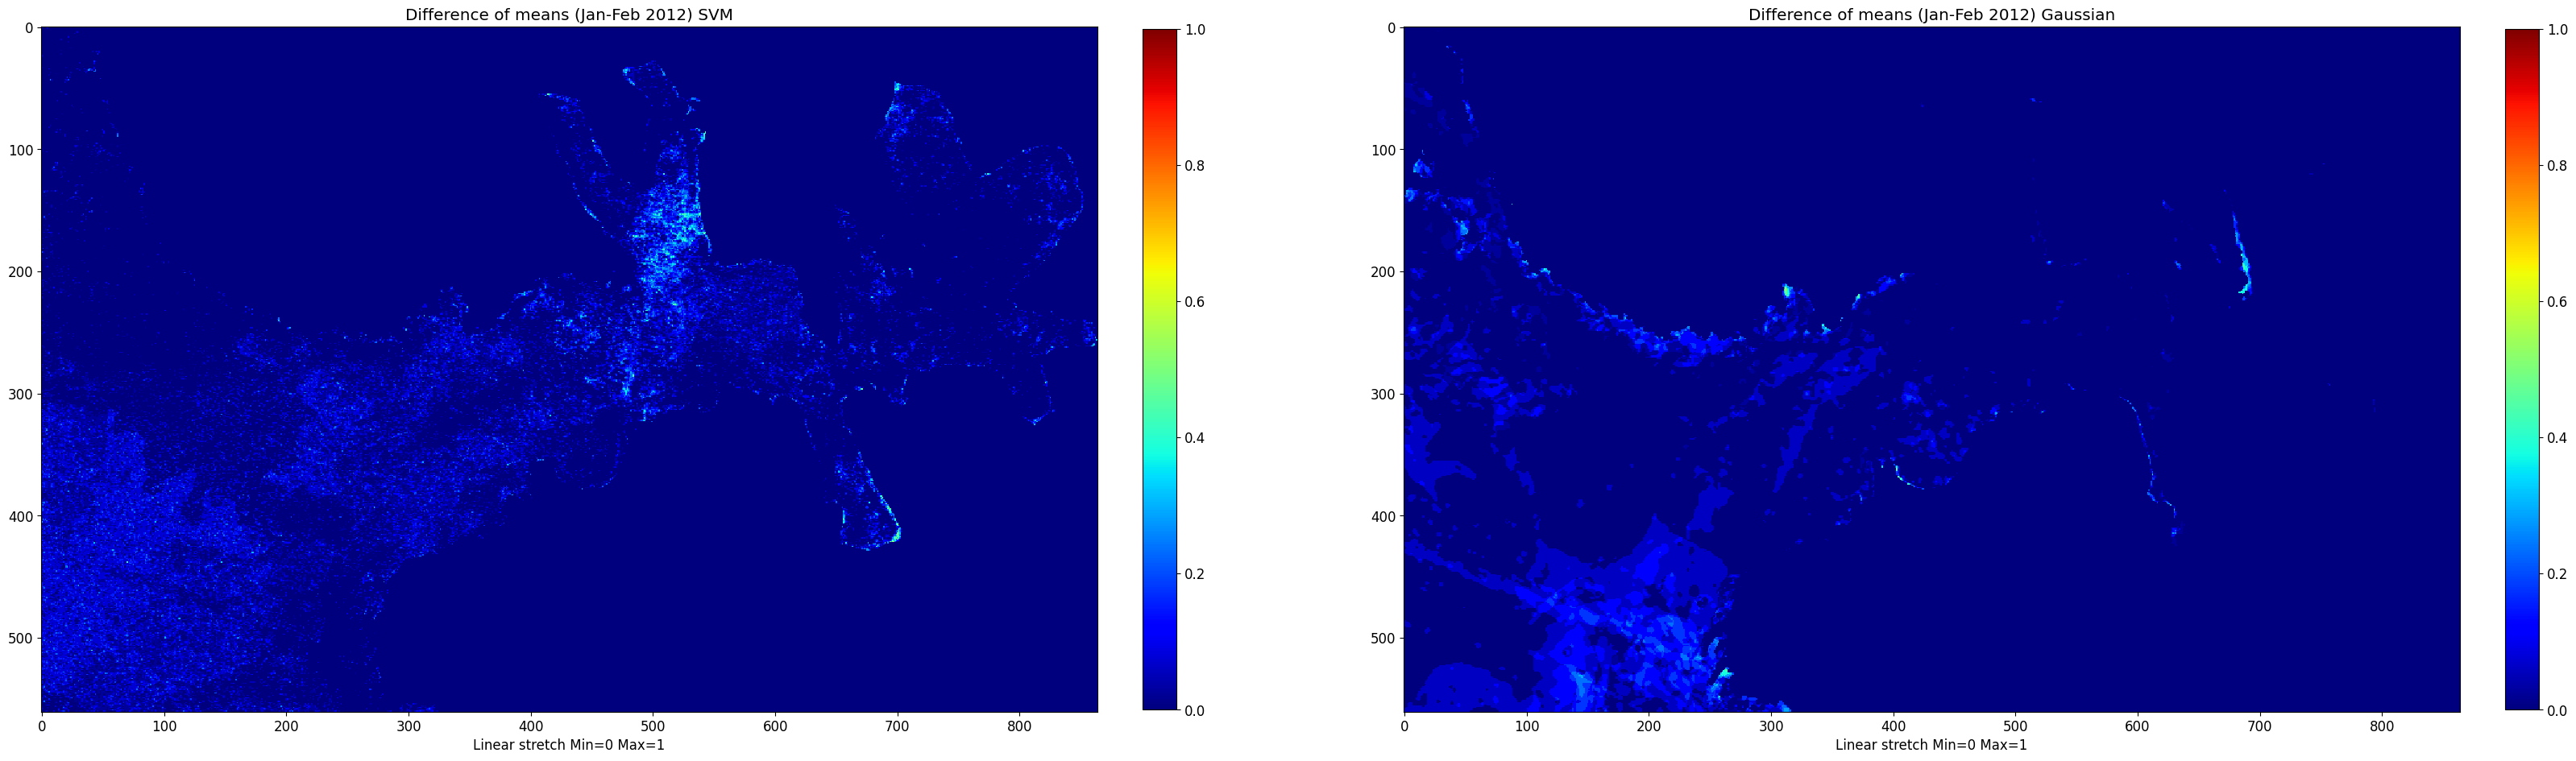

In [19]:
show_two_images(mnmean, sgmean, 'jet', 'jet', 'Difference of means (Jan-Feb 2012) SVM', 'Difference of means (Jan-Feb 2012) Gaussian', 0,1, 0,1)

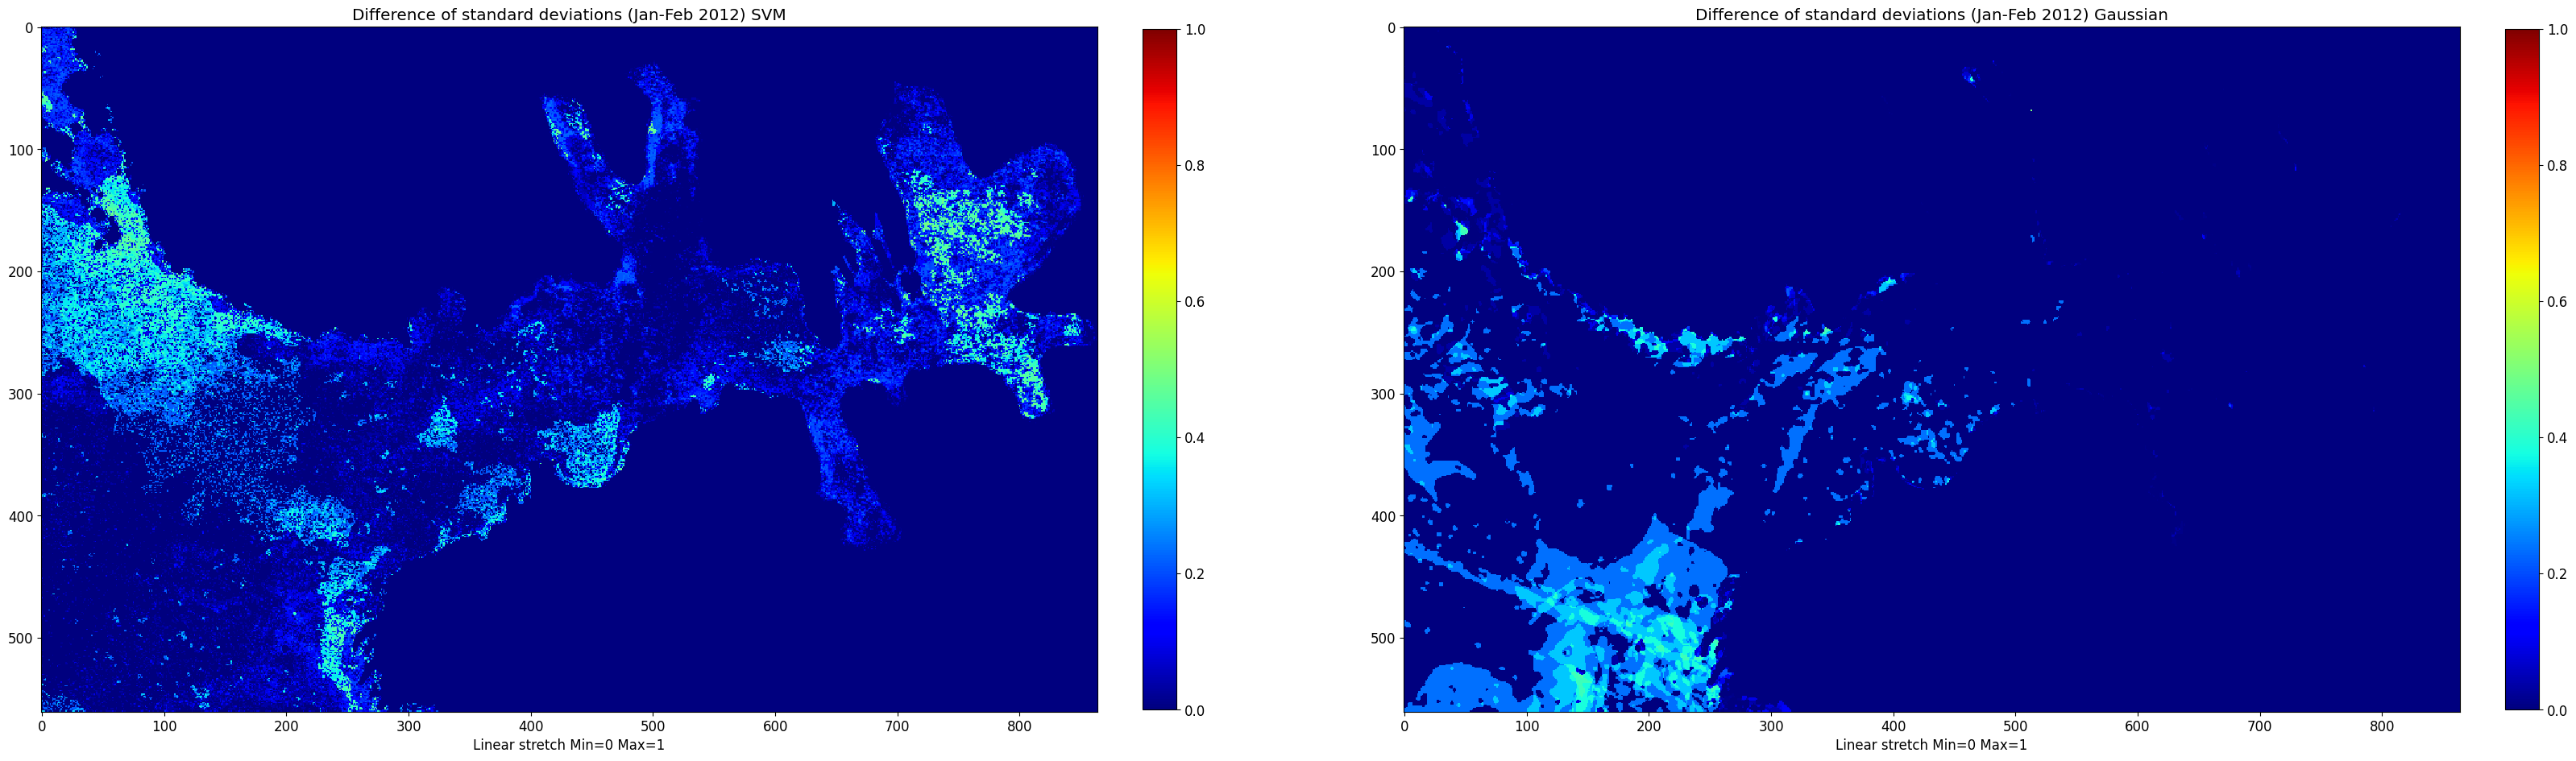

In [21]:
show_two_images(mnsd,sgsd, 'jet', 'jet', 'Difference of standard deviations (Jan-Feb 2012) SVM', 'Difference of standard deviations (Jan-Feb 2012) Gaussian', 0,1, 0,1)

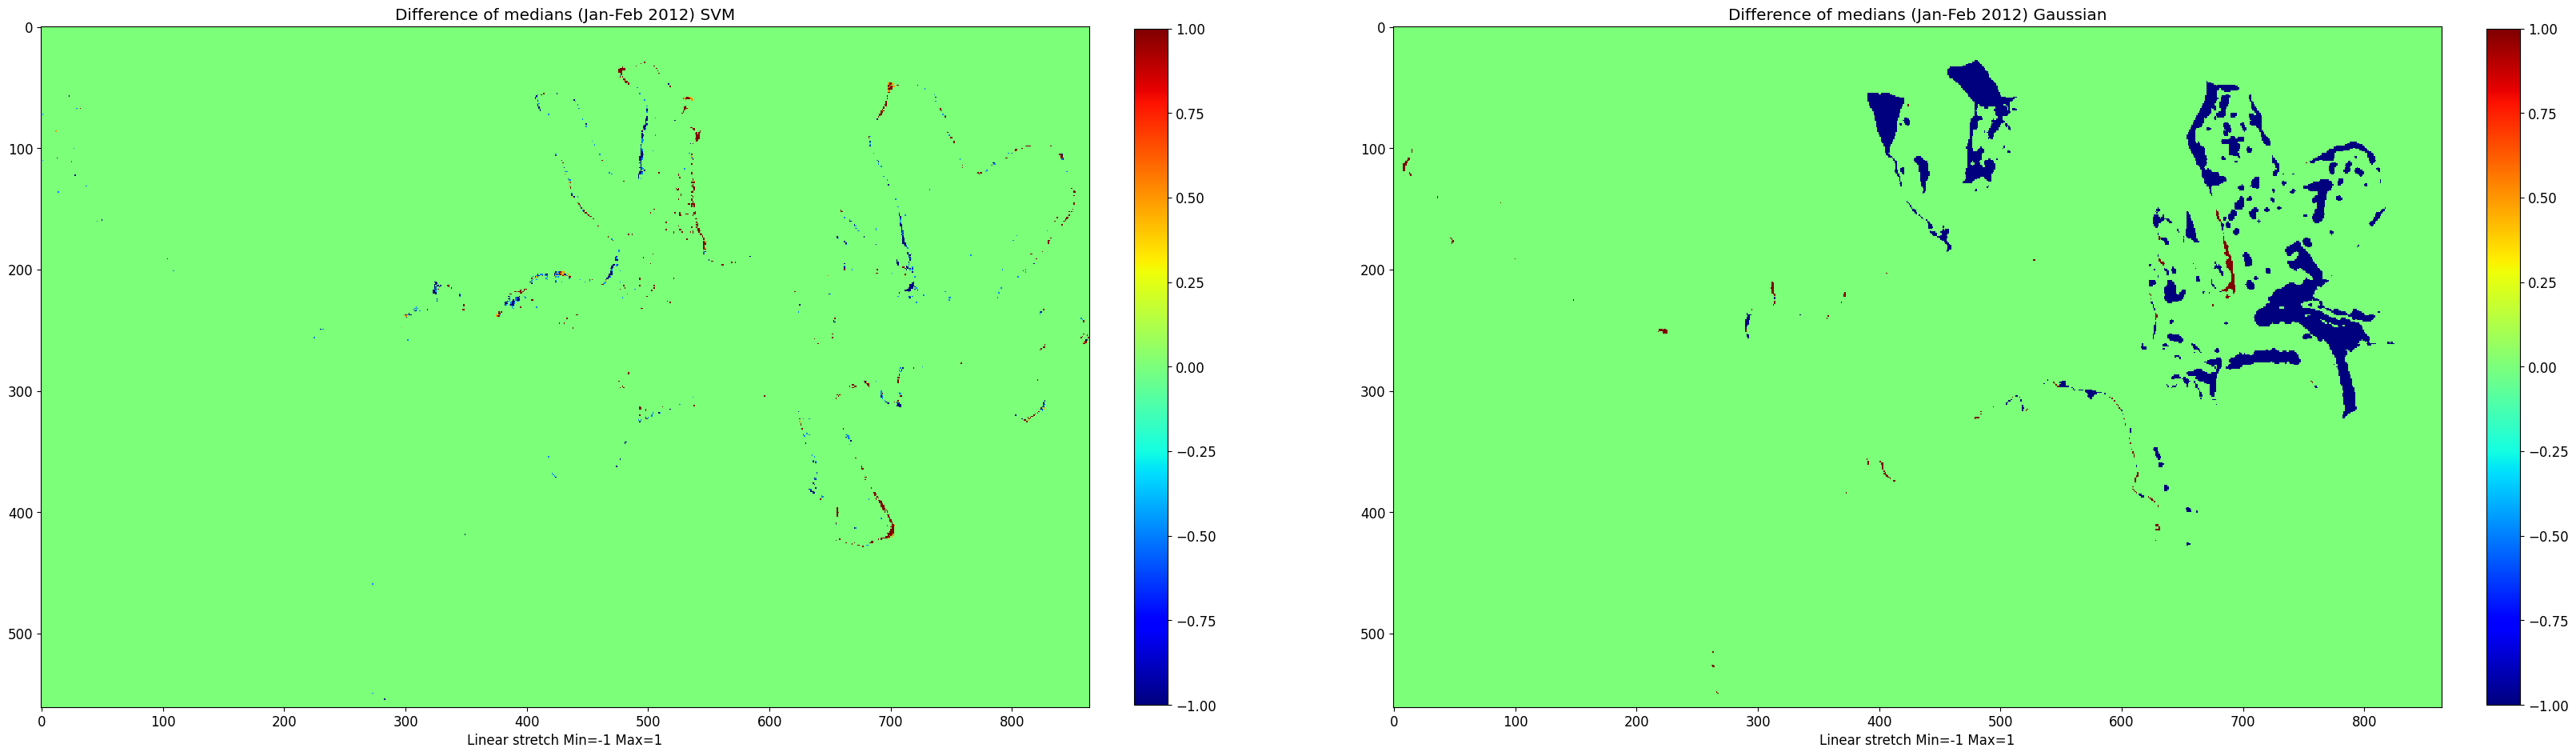

In [23]:
show_two_images(mnmedian, sgmedian, 'jet', 'jet', 'Difference of medians (Jan-Feb 2012) SVM', 'Difference of medians (Jan-Feb 2012) Gaussian', -1,1, -1,1)

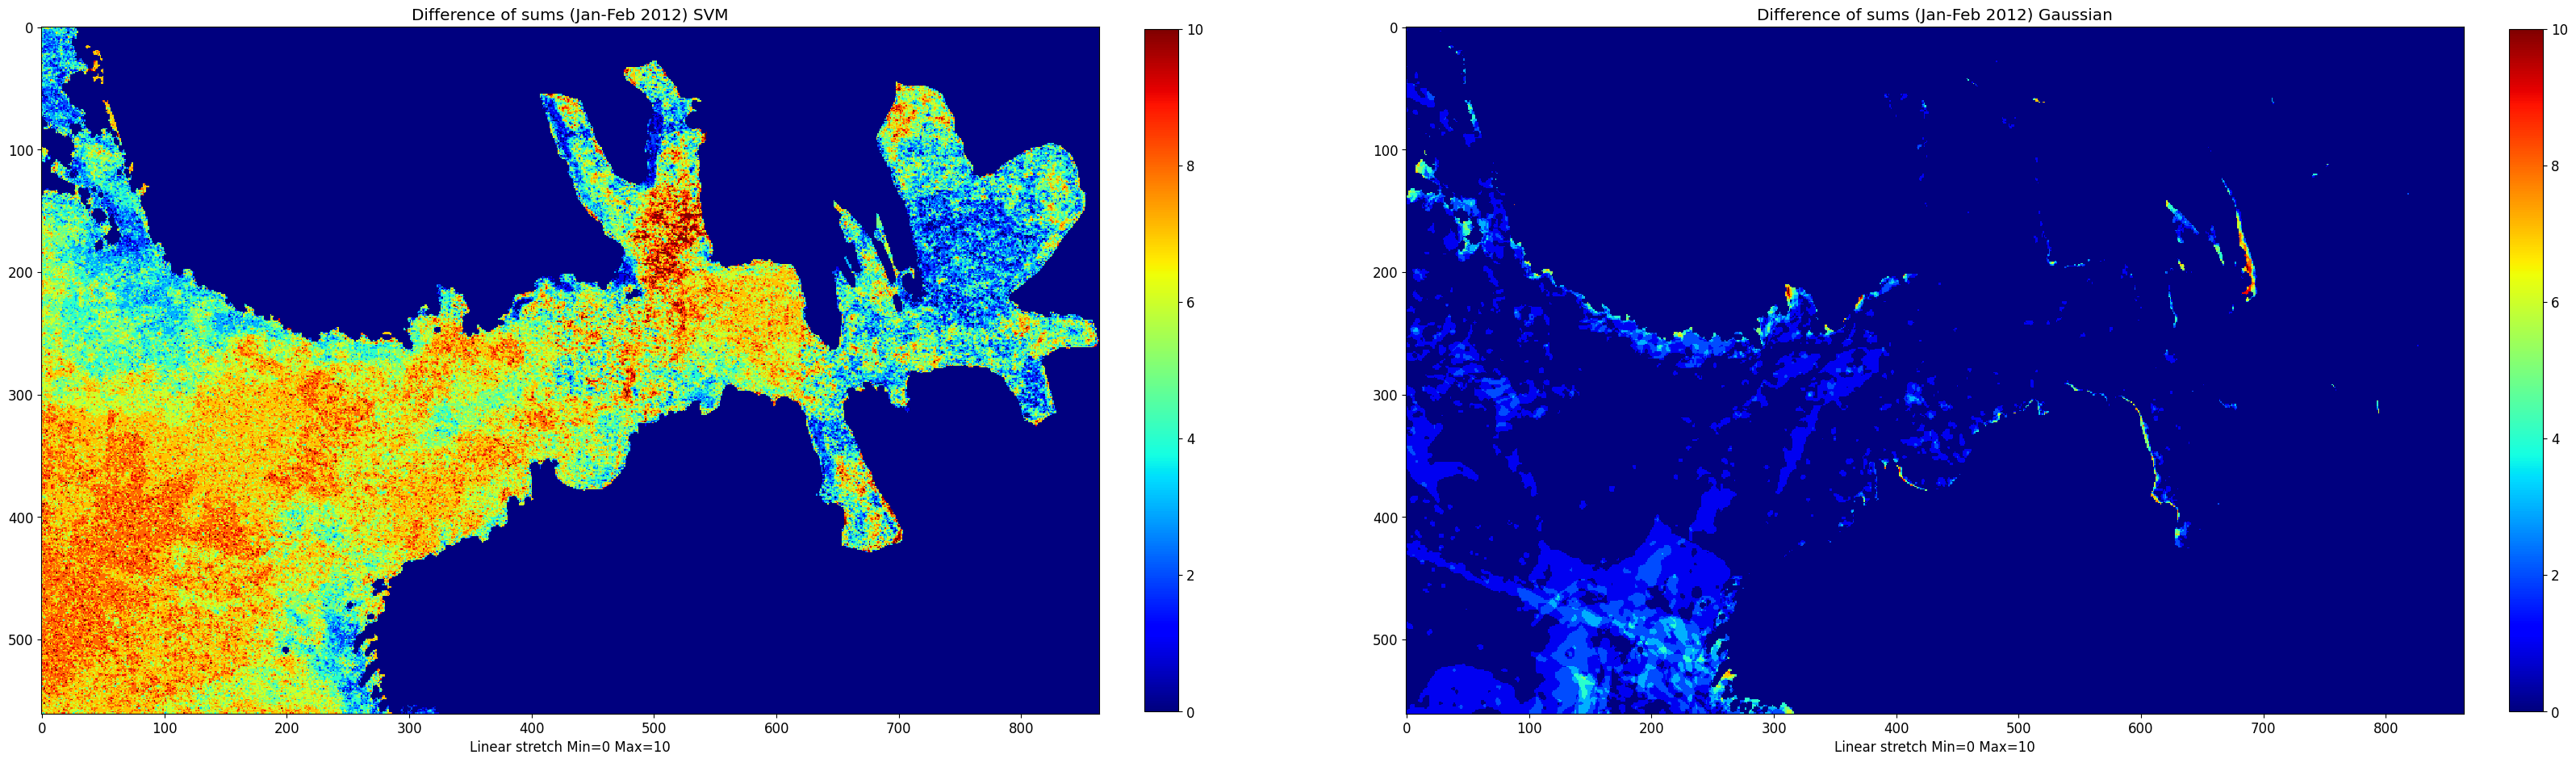

In [25]:
show_two_images(mnsum, sgsum, 'jet', 'jet', 'Difference of sums (Jan-Feb 2012) SVM', 'Difference of sums (Jan-Feb 2012) Gaussian', 0,10, 0,10)